In [33]:
# file kfkd.py
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle

FTRAIN = '/data/facial_keypoints_detection/training.csv'
FTEST = '/data/facial_keypoints_detection/test.csv'

def load(test=False, cols=None):
    """Loads data from FTEST if *test* is True, otherwise from FTRAIN.
    Pass a list of *cols* if you're only interested in a subset of the
    target columns.
    """
    fname = FTEST if test else FTRAIN
    df = read_csv(os.path.expanduser(fname))  # load pandas dataframe

    # The Image column has pixel values separated by space; convert
    # the values to numpy arrays:
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    if cols:  # get a subset of columns
        df = df[list(cols) + ['Image']]

    print(df.count())  # prints the number of values for each column
    df = df.dropna()  # drop all rows that have missing values in them

    X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    if not test:  # only FTRAIN has any target columns
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48  # scale target coordinates to [-1, 1]
        X, y = shuffle(X, y, random_state=42)  # shuffle train data
        y = y.astype(np.float32)
    else:
        y = None

    return X, y


X, y = load()
print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(
    X.shape, X.min(), X.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(
    y.shape, y.min(), y.max()))


left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [ ]:
Net1:  Single hidden layer NeuralNet (hidden_num_units=100)
As shown below, the big gap between the training and validation curves implies the potential overfitting.  
Such effect can be avoided by introducing the regularization.  In addition, it is interesting to 

In [18]:
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet

net1 = NeuralNet(
    layers=[  # three layers: one hidden layer
        ('input', layers.InputLayer),
        ('hidden', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    # layer parameters:
    input_shape=(None, 9216),  # 96x96 input pixels per batch
    hidden_num_units=100,  # number of units in hidden layer
    output_nonlinearity=None,  # output layer uses identity function
    output_num_units=30,  # 30 target values

    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=True,  # flag to indicate we're dealing with regression problem
    max_epochs=750,  # we want to train this many epochs
    verbose=1,
    )

X, y = load()
net1.fit(X, y)

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

NeuralNet(X_tensor_type=<function matrix at 0x7f58c9faa758>,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7f58c10a5150>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7f58c109dc90>,
     custom_score=None, eval_size=0.2, hidden_num_units=100,
     input_shape=(None, 9216),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=750, more_params={},
     objective=<class 'lasagne.objectives.Objective'>,
     objective_loss_function=<function mse at 0x7f58c1ff1758>,
     on_epoch_finished=[<nolearn.lasagne.util.PrintLog instance at 0x7f58d42a6ea8>],
     on_training_finished=[], output_nonlinearity=None,
     output_num_units=30, regression=True,
     update=<function nesterov_momentum at 0x7f58c1ff1e60>,
     update_learning_rate=0.01, update_momentum=0.9,
     use_label_encoder=False,

In [19]:
import numpy as np

np.sqrt(0.00280) * 48
2.7385251505144153

2.7385251505144153

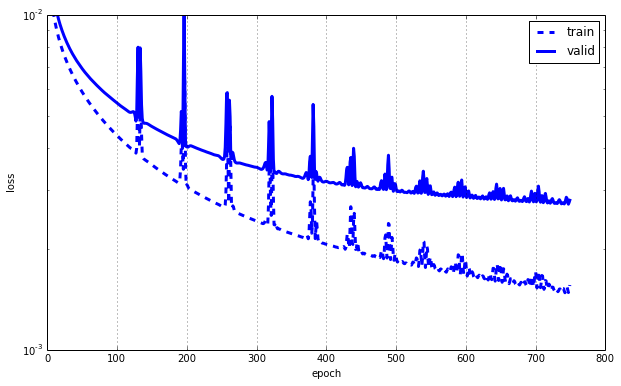

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline 

train_loss = np.array([i["train_loss"] for i in net1.train_history_])
valid_loss = np.array([i["valid_loss"] for i in net1.train_history_])

plt.figure(figsize=(10, 6))
plt.plot(train_loss, linewidth=3, color="blue", linestyle="dashed", label="train")
plt.plot(valid_loss, linewidth=3, color="blue", linestyle="solid", label="valid")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.ylim(1e-3, 1e-2)
plt.yscale("log")

plt.show()

ImageId    1783
Image      1783
dtype: int64


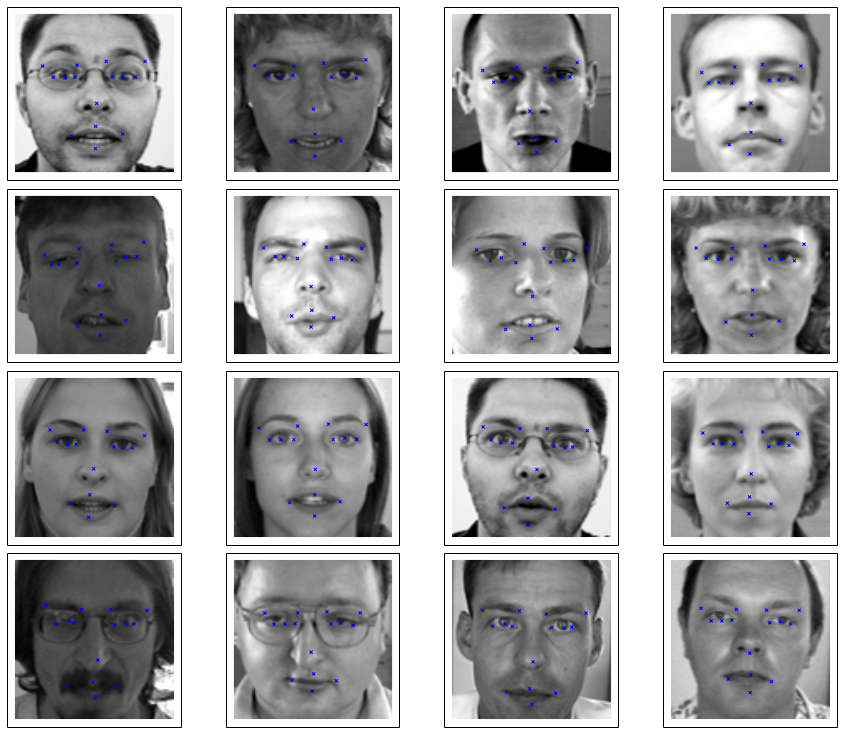

In [21]:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)

X, _ = load(test=True)
y_pred = net1.predict(X)

fig = plt.figure(figsize=(12, 10))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X[i], y_pred[i], ax)

plt.show()

In [22]:
def load2d(test=False, cols=None):
    X, y = load(test=test)
    X = X.reshape(-1, 1, 96, 96)
    return X, y

net2 = NeuralNet(
    layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),
        ('conv2', layers.Conv2DLayer),
        ('pool2', layers.MaxPool2DLayer),
        ('conv3', layers.Conv2DLayer),
        ('pool3', layers.MaxPool2DLayer),
        ('hidden4', layers.DenseLayer),
        ('hidden5', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, 1, 96, 96),
    conv1_num_filters=32, conv1_filter_size=(3, 3), pool1_pool_size=(2, 2),
    conv2_num_filters=64, conv2_filter_size=(2, 2), pool2_pool_size=(2, 2),
    conv3_num_filters=128, conv3_filter_size=(2, 2), pool3_pool_size=(2, 2),
    hidden4_num_units=500, hidden5_num_units=500,
    output_num_units=30, output_nonlinearity=None,

    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=True,
    max_epochs=750,
    verbose=1,
    )

X, y = load2d()  # load 2-d data
net2.fit(X, y)

# Training for 1000 epochs will take a while.  We'll pickle the
# trained model so that we can load it back later:
import cPickle as pickle
with open('net2.pickle', 'wb') as f:
    pickle.dump(net2, f, -1)

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [85]:
np.sqrt( 0.00175) * 48
1.8994904579913006

1.8994904579913006

ImageId    1783
Image      1783
dtype: int64
ImageId    1783
Image      1783
dtype: int64


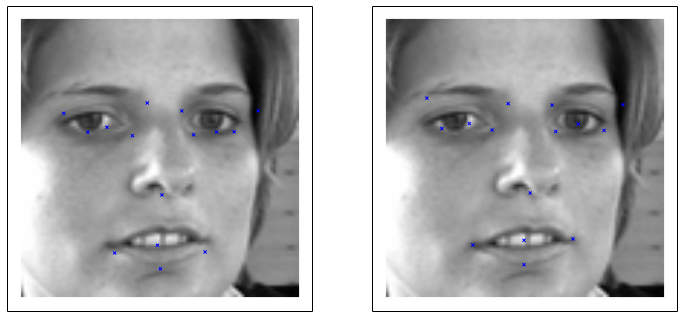

In [24]:
sample1 = load(test=True)[0][6:7]
sample2 = load2d(test=True)[0][6:7]
y_pred1 = net1.predict(sample1)[0]
y_pred2 = net2.predict(sample2)[0]

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
plot_sample(sample1[0], y_pred1, ax)
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
plot_sample(sample1[0], y_pred2, ax)
plt.show()

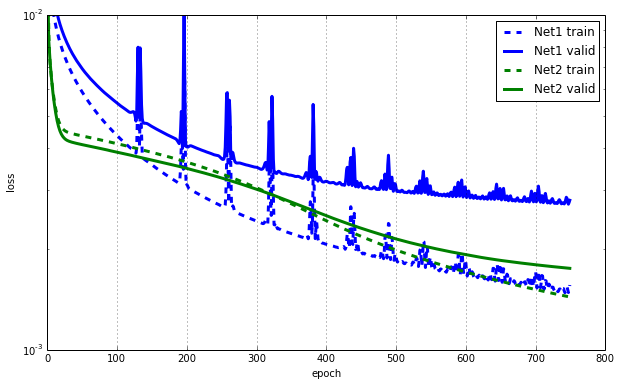

In [82]:
net1_train_loss = np.array([i["train_loss"] for i in net1.train_history_])
net1_valid_loss = np.array([i["valid_loss"] for i in net1.train_history_])
net2_train_loss = np.array([i["train_loss"] for i in net2.train_history_])
net2_valid_loss = np.array([i["valid_loss"] for i in net2.train_history_])

plt.figure(figsize=(10, 6))
plt.plot(net1_train_loss, linewidth=3, color="blue", linestyle="dashed", label="Net1 train")
plt.plot(net1_valid_loss, linewidth=3, color="blue", linestyle="solid", label="Net1 valid")
plt.plot(net2_train_loss, linewidth=3, color="green", linestyle="dashed", label="Net2 train")
plt.plot(net2_valid_loss, linewidth=3, color="green", linestyle="solid",label="Net2 valid")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.ylim(1e-3, 1e-2)
plt.yscale("log")

plt.show()

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

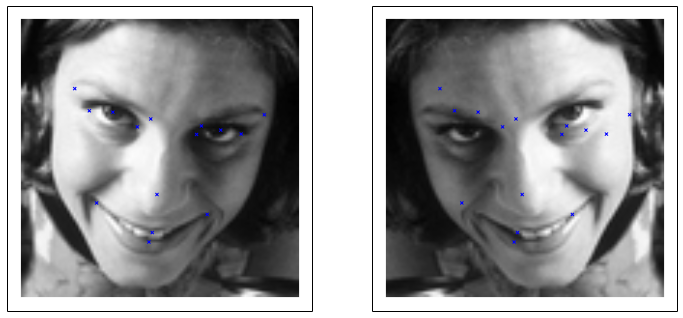

In [40]:
X, y = load2d()
X_flipped = X[:, :, :, ::-1]  # simple slice to flip all images

# plot two images:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
plot_sample(X[1], y[1], ax)
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
plot_sample(X_flipped[1], y[1], ax)
plt.show()

In [41]:
flip_indices = [
    (0, 2), (1, 3),
    (4, 8), (5, 9), (6, 10), (7, 11),
    (12, 16), (13, 17), (14, 18), (15, 19),
    (22, 24), (23, 25),
    ]

# Let's see if we got it right:
df = read_csv(os.path.expanduser(FTRAIN))
for i, j in flip_indices:
    print("# {} -> {}".format(df.columns[i], df.columns[j]))

# this prints out:
# left_eye_center_x -> right_eye_center_x
# left_eye_center_y -> right_eye_center_y
# left_eye_inner_corner_x -> right_eye_inner_corner_x
# left_eye_inner_corner_y -> right_eye_inner_corner_y
# left_eye_outer_corner_x -> right_eye_outer_corner_x
# left_eye_outer_corner_y -> right_eye_outer_corner_y
# left_eyebrow_inner_end_x -> right_eyebrow_inner_end_x
# left_eyebrow_inner_end_y -> right_eyebrow_inner_end_y
# left_eyebrow_outer_end_x -> right_eyebrow_outer_end_x
# left_eyebrow_outer_end_y -> right_eyebrow_outer_end_y
# mouth_left_corner_x -> mouth_right_corner_x
# mouth_left_corner_y -> mouth_right_corner_y

# left_eye_center_x -> right_eye_center_x
# left_eye_center_y -> right_eye_center_y
# left_eye_inner_corner_x -> right_eye_inner_corner_x
# left_eye_inner_corner_y -> right_eye_inner_corner_y
# left_eye_outer_corner_x -> right_eye_outer_corner_x
# left_eye_outer_corner_y -> right_eye_outer_corner_y
# left_eyebrow_inner_end_x -> right_eyebrow_inner_end_x
# left_eyebrow_inner_end_y -> right_eyebrow_inner_end_y
# left_eyebrow_outer_end_x -> right_eyebrow_outer_end_x
# left_eyebrow_outer_end_y -> right_eyebrow_outer_end_y
# mouth_left_corner_x -> mouth_right_corner_x
# mouth_left_corner_y -> mouth_right_corner_y


In [42]:
from nolearn.lasagne import BatchIterator

class FlipBatchIterator(BatchIterator):
    flip_indices = [
        (0, 2), (1, 3),
        (4, 8), (5, 9), (6, 10), (7, 11),
        (12, 16), (13, 17), (14, 18), (15, 19),
        (22, 24), (23, 25),
        ]

    def transform(self, Xb, yb):
        Xb, yb = super(FlipBatchIterator, self).transform(Xb, yb)

        # Flip half of the images in this batch at random:
        bs = Xb.shape[0]
        indices = np.random.choice(bs, bs / 2, replace=False)
        Xb[indices] = Xb[indices, :, :, ::-1]

        if yb is not None:
            # Horizontal flip of all x coordinates:
            yb[indices, ::2] = yb[indices, ::2] * -1

            # Swap places, e.g. left_eye_center_x -> right_eye_center_x
            for a, b in self.flip_indices:
                yb[indices, a], yb[indices, b] = (
                    yb[indices, b], yb[indices, a])

        return Xb, yb

In [43]:
net3 = NeuralNet(
    layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),
        ('conv2', layers.Conv2DLayer),
        ('pool2', layers.MaxPool2DLayer),
        ('conv3', layers.Conv2DLayer),
        ('pool3', layers.MaxPool2DLayer),
        ('hidden4', layers.DenseLayer),
        ('hidden5', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, 1, 96, 96),
    conv1_num_filters=32, conv1_filter_size=(3, 3), pool1_pool_size=(2, 2),
    conv2_num_filters=64, conv2_filter_size=(2, 2), pool2_pool_size=(2, 2),
    conv3_num_filters=128, conv3_filter_size=(2, 2), pool3_pool_size=(2, 2),
    hidden4_num_units=500, hidden5_num_units=500,
    output_num_units=30, output_nonlinearity=None,

    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=True,
    batch_iterator_train=FlipBatchIterator(batch_size=128),
    max_epochs=750,
    verbose=1,
    )

net3.fit(X, y)

import cPickle as pickle
with open('net3.pickle', 'wb') as f:
    pickle.dump(net3, f, -1)

  input             	(None, 1, 96, 96)   	produces    9216 outputs
  conv1             	(None, 32, 94, 94)  	produces  282752 outputs
  pool1             	(None, 32, 47, 47)  	produces   70688 outputs
  conv2             	(None, 64, 46, 46)  	produces  135424 outputs
  pool2             	(None, 64, 23, 23)  	produces   33856 outputs
  conv3             	(None, 128, 22, 22) 	produces   61952 outputs
  pool3             	(None, 128, 11, 11) 	produces   15488 outputs
  hidden4           	(None, 500)         	produces     500 outputs
  hidden5           	(None, 500)         	produces     500 outputs
  output            	(None, 30)          	produces      30 outputs
  epoch    train loss    valid loss    train/val  dur
-------  ------------  ------------  -----------  -----
      1       0.11587       0.05249      2.20750  2.93s
      2       0.02128       0.00860      2.47400  2.94s
      3       0.00836       0.00762      1.09697  2.94s
      4       0.00700       0.00700      1.00039  2.

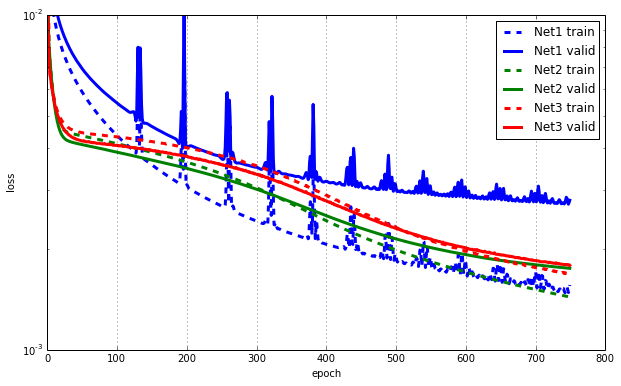

In [81]:
net1_train_loss = np.array([i["train_loss"] for i in net1.train_history_])
net1_valid_loss = np.array([i["valid_loss"] for i in net1.train_history_])
net2_train_loss = np.array([i["train_loss"] for i in net2.train_history_])
net2_valid_loss = np.array([i["valid_loss"] for i in net2.train_history_])
net3_train_loss = np.array([i["train_loss"] for i in net3.train_history_])
net3_valid_loss = np.array([i["valid_loss"] for i in net3.train_history_])

plt.figure(figsize=(10, 6))
plt.plot(net1_train_loss, linewidth=3, color="blue", linestyle="dashed", label="Net1 train")
plt.plot(net1_valid_loss, linewidth=3, color="blue", linestyle="solid", label="Net1 valid")
plt.plot(net2_train_loss, linewidth=3, color="green", linestyle="dashed", label="Net2 train")
plt.plot(net2_valid_loss, linewidth=3, color="green", linestyle="solid", label="Net2 valid")
plt.plot(net3_train_loss, linewidth=3, color="red", linestyle="dashed", label="Net3 train")
plt.plot(net3_valid_loss, linewidth=3, color="red", linestyle="solid", label="Net3 valid")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.ylim(1e-3, 1e-2)
plt.yscale("log")

plt.show()

Net5:  

In [49]:
import theano

def float32(k):
    return np.cast['float32'](k)

class AdjustVariable(object):
    def __init__(self, name, start=0.03, stop=0.001):
        self.name = name
        self.start, self.stop = start, stop
        self.ls = None

    def __call__(self, nn, train_history):
        if self.ls is None:
            self.ls = np.linspace(self.start, self.stop, nn.max_epochs)

        epoch = train_history[-1]['epoch']
        new_value = float32(self.ls[epoch - 1])
        getattr(nn, self.name).set_value(new_value)

net4 = NeuralNet(
    layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),
        ('conv2', layers.Conv2DLayer),
        ('pool2', layers.MaxPool2DLayer),
        ('conv3', layers.Conv2DLayer),
        ('pool3', layers.MaxPool2DLayer),
        ('hidden4', layers.DenseLayer),
        ('hidden5', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, 1, 96, 96),
    conv1_num_filters=32, conv1_filter_size=(3, 3), pool1_pool_size=(2, 2),
    conv2_num_filters=64, conv2_filter_size=(2, 2), pool2_pool_size=(2, 2),
    conv3_num_filters=128, conv3_filter_size=(2, 2), pool3_pool_size=(2, 2),
    hidden4_num_units=500, hidden5_num_units=500,
    output_num_units=30, output_nonlinearity=None,
    
    update_learning_rate=theano.shared(float32(0.03)),
    update_momentum=theano.shared(float32(0.9)),
    
    regression=True,
    # batch_iterator_train=FlipBatchIterator(batch_size=128),
    on_epoch_finished=[
        AdjustVariable('update_learning_rate', start=0.03, stop=0.0001),
        AdjustVariable('update_momentum', start=0.9, stop=0.999),
        ],
    max_epochs=750,
    verbose=1,
    )

X, y = load2d()
net4.fit(X, y)

with open('net4.pickle', 'wb') as f:
    pickle.dump(net4, f, -1)

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [67]:
net5 = NeuralNet(
    layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),
        ('conv2', layers.Conv2DLayer),
        ('pool2', layers.MaxPool2DLayer),
        ('conv3', layers.Conv2DLayer),
        ('pool3', layers.MaxPool2DLayer),
        ('hidden4', layers.DenseLayer),
        ('hidden5', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, 1, 96, 96),
    conv1_num_filters=32, conv1_filter_size=(3, 3), pool1_pool_size=(2, 2),
    conv2_num_filters=64, conv2_filter_size=(2, 2), pool2_pool_size=(2, 2),
    conv3_num_filters=128, conv3_filter_size=(2, 2), pool3_pool_size=(2, 2),
    hidden4_num_units=500, hidden5_num_units=500,
    output_num_units=30, output_nonlinearity=None,

    update_learning_rate=theano.shared(float32(0.03)),
    update_momentum=theano.shared(float32(0.9)),

    regression=True,
    batch_iterator_train=FlipBatchIterator(batch_size=128),
    on_epoch_finished=[
        AdjustVariable('update_learning_rate', start=0.03, stop=0.0001),
        AdjustVariable('update_momentum', start=0.9, stop=0.999),
        ],
    max_epochs=750,
    verbose=1,
    )

net5.fit(X, y)

import cPickle as pickle
with open('net5.pickle', 'wb') as f:
    pickle.dump(net5, f, -1)

  input             	(None, 1, 96, 96)   	produces    9216 outputs
  conv1             	(None, 32, 94, 94)  	produces  282752 outputs
  pool1             	(None, 32, 47, 47)  	produces   70688 outputs
  conv2             	(None, 64, 46, 46)  	produces  135424 outputs
  pool2             	(None, 64, 23, 23)  	produces   33856 outputs
  conv3             	(None, 128, 22, 22) 	produces   61952 outputs
  pool3             	(None, 128, 11, 11) 	produces   15488 outputs
  hidden4           	(None, 500)         	produces     500 outputs
  hidden5           	(None, 500)         	produces     500 outputs
  output            	(None, 30)          	produces      30 outputs
  epoch    train loss    valid loss    train/val  dur
-------  ------------  ------------  -----------  -----
      1       0.05714       0.01005      5.68781  2.93s
      2       0.00783       0.00650      1.20528  2.94s
      3       0.00606       0.00564      1.07441  2.93s
      4       0.00550       0.00519      1.06052  2.

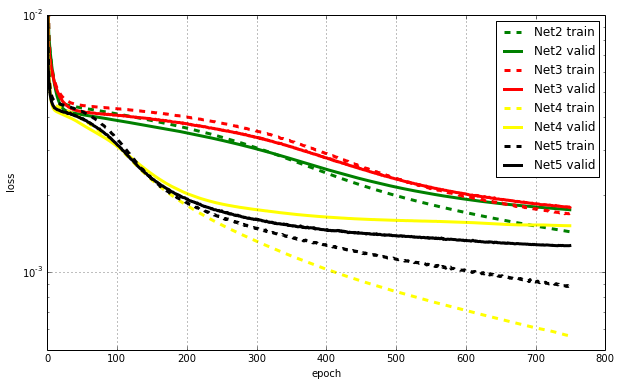

In [89]:

net2_train_loss = np.array([i["train_loss"] for i in net2.train_history_])
net2_valid_loss = np.array([i["valid_loss"] for i in net2.train_history_])
net3_train_loss = np.array([i["train_loss"] for i in net3.train_history_])
net3_valid_loss = np.array([i["valid_loss"] for i in net3.train_history_])
net4_train_loss = np.array([i["train_loss"] for i in net4.train_history_])
net4_valid_loss = np.array([i["valid_loss"] for i in net4.train_history_])
net5_train_loss = np.array([i["train_loss"] for i in net5.train_history_])
net5_valid_loss = np.array([i["valid_loss"] for i in net5.train_history_])

plt.figure(figsize=(10, 6))
plt.plot(net2_train_loss, linewidth=3,  color="green", linestyle="dashed", label="Net2 train")
plt.plot(net2_valid_loss, linewidth=3,  color="green", linestyle="solid", label="Net2 valid")
plt.plot(net3_train_loss, linewidth=3,  color="red", linestyle="dashed", label="Net3 train")
plt.plot(net3_valid_loss, linewidth=3,  color="red", linestyle="solid", label="Net3 valid")
plt.plot(net4_train_loss, linewidth=3,  color="yellow", linestyle="dashed", label="Net4 train")
plt.plot(net4_valid_loss, linewidth=3,  color="yellow", linestyle="solid", label="Net4 valid")
plt.plot(net5_train_loss, linewidth=3,  color="black", linestyle="dashed", label="Net5 train")
plt.plot(net5_valid_loss, linewidth=3,  color="black", linestyle="solid", label="Net5 valid")

plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.ylim(5*1e-4, 1e-2)
plt.yscale("log")

plt.show()

In [86]:
np.sqrt(0.00127) * 48


1.7105788493957244

It is clear that in this case Net4 is overfitting, which need further regularization.  Although the deegree of overfitting in Net5 is not as severe as Net4, it can become worse when the model is trained with longer epoch.  Therefore, at the next step, the dropout layers are added to regularize the Net4 model.  (Remember that after the dropout layers are added, the train error will be evaluated with dropout, whereas the validation error is still evaluated without dropout. )

In [91]:
net6 = NeuralNet(
    layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),
        ('dropout1', layers.DropoutLayer),  # !
        ('conv2', layers.Conv2DLayer),
        ('pool2', layers.MaxPool2DLayer),
        ('dropout2', layers.DropoutLayer),  # !
        ('conv3', layers.Conv2DLayer),
        ('pool3', layers.MaxPool2DLayer),
        ('dropout3', layers.DropoutLayer),  # !
        ('hidden4', layers.DenseLayer),
        ('dropout4', layers.DropoutLayer),  # !
        ('hidden5', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, 1, 96, 96),
    conv1_num_filters=32, conv1_filter_size=(3, 3), pool1_pool_size=(2, 2),
    dropout1_p=0.1,  # !
    conv2_num_filters=64, conv2_filter_size=(2, 2), pool2_pool_size=(2, 2),
    dropout2_p=0.2,  # !
    conv3_num_filters=128, conv3_filter_size=(2, 2), pool3_pool_size=(2, 2),
    dropout3_p=0.3,  # !
    hidden4_num_units=500,
    dropout4_p=0.5,  # !
    hidden5_num_units=500,
    output_num_units=30, output_nonlinearity=None,

    update_learning_rate=theano.shared(float32(0.03)),
    update_momentum=theano.shared(float32(0.9)),

    regression=True,
    batch_iterator_train=FlipBatchIterator(batch_size=128),
    on_epoch_finished=[
        AdjustVariable('update_learning_rate', start=0.03, stop=0.0001),
        AdjustVariable('update_momentum', start=0.9, stop=0.999),
        ],
    max_epochs=750,
    verbose=1,
    )

In [92]:
import sys
sys.setrecursionlimit(10000)

X, y = load2d()
net6.fit(X, y)

import cPickle as pickle
with open('net6.pickle', 'wb') as f:
    pickle.dump(net6, f, -1)

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

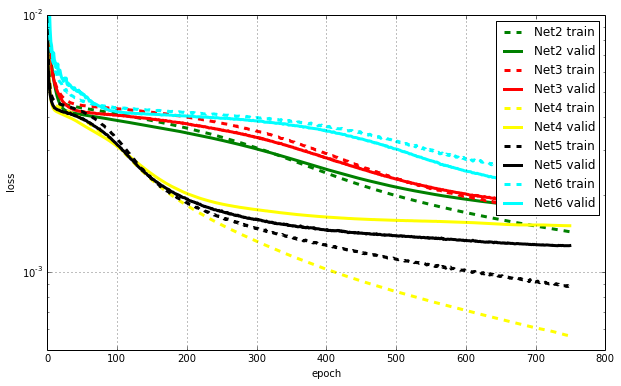

In [93]:
net2_train_loss = np.array([i["train_loss"] for i in net2.train_history_])
net2_valid_loss = np.array([i["valid_loss"] for i in net2.train_history_])
net3_train_loss = np.array([i["train_loss"] for i in net3.train_history_])
net3_valid_loss = np.array([i["valid_loss"] for i in net3.train_history_])
net4_train_loss = np.array([i["train_loss"] for i in net4.train_history_])
net4_valid_loss = np.array([i["valid_loss"] for i in net4.train_history_])
net5_train_loss = np.array([i["train_loss"] for i in net5.train_history_])
net5_valid_loss = np.array([i["valid_loss"] for i in net5.train_history_])
net6_train_loss = np.array([i["train_loss"] for i in net6.train_history_])
net6_valid_loss = np.array([i["valid_loss"] for i in net6.train_history_])

plt.figure(figsize=(10, 6))
plt.plot(net2_train_loss, linewidth=3,  color="green", linestyle="dashed", label="Net2 train")
plt.plot(net2_valid_loss, linewidth=3,  color="green", linestyle="solid", label="Net2 valid")
plt.plot(net3_train_loss, linewidth=3,  color="red", linestyle="dashed", label="Net3 train")
plt.plot(net3_valid_loss, linewidth=3,  color="red", linestyle="solid", label="Net3 valid")
plt.plot(net4_train_loss, linewidth=3,  color="yellow", linestyle="dashed", label="Net4 train")
plt.plot(net4_valid_loss, linewidth=3,  color="yellow", linestyle="solid", label="Net4 valid")
plt.plot(net5_train_loss, linewidth=3,  color="black", linestyle="dashed", label="Net5 train")
plt.plot(net5_valid_loss, linewidth=3,  color="black", linestyle="solid", label="Net5 valid")
plt.plot(net6_train_loss, linewidth=3,  color="cyan", linestyle="dashed", label="Net6 train")
plt.plot(net6_valid_loss, linewidth=3,  color="cyan", linestyle="solid", label="Net6 valid")

plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.ylim(5*1e-4, 1e-2)
plt.yscale("log")

plt.show()